In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

import random
from grid import *
from utils import *
from floor import *
import cv2 as cv
import os

In [2]:
# 1. Complete color scheme for all wall types
COLOR_SCHEME = {
    Wall.EMPTY: "#FFFFFF",    # White (empty)
    Wall.INSIDE: "#F0F0F0",   # Light gray (floor)
    Wall.UP: "#2E4053",
    Wall.RIGHT: "#2E4053",
    Wall.DOWN: "#2E4053",
    Wall.LEFT: "#2E4053",
    Wall.HORIZ: "#1B2631",    # Dark horizontal
    Wall.VERT: "#1B2631",     # Dark vertical
    Wall.UPLEFT: "#566573",
    Wall.UPRIGHT: "#566573",
    Wall.DOWNLEFT: "#566573",
    Wall.DOWNRIGHT: "#566573",
    Wall.T_UP: "#34495E",
    Wall.T_DOWN: "#34495E",
    Wall.T_LEFT: "#34495E",
    Wall.T_RIGHT: "#34495E",
    Wall.CROSS: "#000000",    # Black for intersections
    #Wall.STANDALONE: "#808B96"  # Medium gray for single walls
}

# 2. Fixed generate_svg function
def generate_svg(grid, cell_size=10, output_file="walls.svg"):
    svg_width = len(grid[0]) * cell_size  # 3x3 blocks per cell
    svg_height = len(grid) * cell_size
    
    svg_content = f'''<svg width="{svg_width}" height="{svg_height}" 
    xmlns="http://www.w3.org/2000/svg">
    <rect width="100%" height="100%" fill="{COLOR_SCHEME[Wall.EMPTY]}"/>
    {render_cells(grid, cell_size)}
    </svg>'''
    
    with open(output_file, "w") as f:
        f.write(svg_content)

# 3. Enhanced render_cells function
def render_cells(grid, cell_size):
    elements = []
    block_size = cell_size
    
    for y, row in enumerate(grid):
        for x, wall in enumerate(row):
            # Base position for the cell
            base_x = x * cell_size
            base_y = y * cell_size
            
            for i, row_pattern in enumerate(wall.ins):
                for j, val in enumerate(row_pattern):
                    if val == 1:
                        elements.append(
                            f'<rect x="{base_x + j * block_size:.2f}" '
                            f'y="{base_y + i * block_size:.2f}" '
                            f'width="{block_size:.2f}" '
                            f'height="{block_size:.2f}" '
                            f'fill="{COLOR_SCHEME.get(wall, "#FF0000")}" '
                            'stroke-width="0.5" stroke="#000"/>'
                        )
    return '\n'.join(elements)

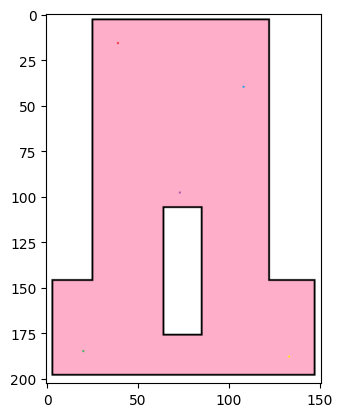

In [3]:
floorplans = []
data_dir = "data/pre_defined/"
for filename in os.listdir(data_dir):
    if filename.lower().endswith(('.png', 'jpeg')):
        filepath = os.path.join(data_dir, filename)
        floorplan = cv.imread(filepath)
        floorplan = cv.cvtColor(floorplan, cv.COLOR_BGR2RGB)
        plt.imshow(floorplan)
        floorplans.append(floorplan)

(31, 19, 128)
(97, 24, 130)
(132, 59, 144)
(86, 96, 132)
(15, 98, 129)


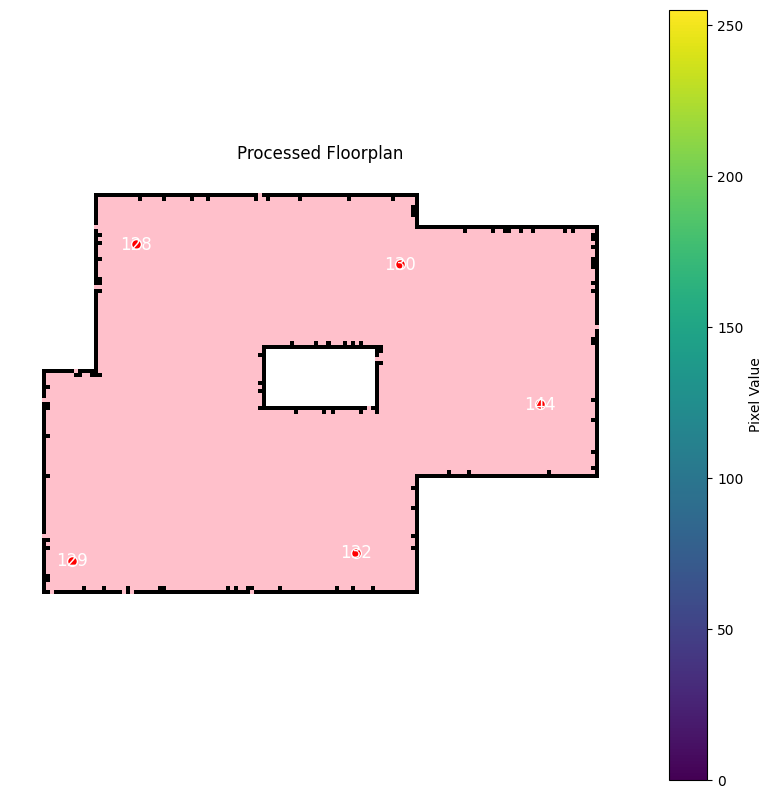

IndexError: index 114 is out of bounds for axis 0 with size 114

In [ ]:
floorplans_int = []
all_seeds = []
from floor import FloorPlan

def make_organic_walls(grid):
    maker = WallMaker(grid)
    return maker.make_walls()

# After initial layout generation:

for floorplan in floorplans[1:]:
    floorplan_int, seed_list = image_to_int(floorplan)
    fp = FloorPlan(floorplan_int, seed_list)
    # Optionally plot the floorplan with seed locations
    # plot_floorplan(floorplan_int, seed_list)
    
    floorplans_int.append(floorplan_int)
    #fp.grid = make_organic_walls(fp.grid)

    fp.show()
    fp.grow_regions()
    # Optionally generate mapping rectangles, fill rooms and refine walls
    fp.generate_mapping_rectangles()
    fp.generate_stairs()
    fp.generate_corridors(min_width=3)
    
    # Display the result
    fp.show()
    print(fp.grid)
    grid_svg = Wall.convert_to_3x3(fp.grid.astype(int).tolist())

    generate_svg(grid_svg, cell_size=10, output_file="complex_layout.svg")
